# Import libraries and read data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model

In [3]:
data = pd.read_csv("a1_b1_c1.csv")
# data = pd.read_csv("a1_b1_c2.csv")
# data = pd.read_csv("a1_b2_c1.csv")
# data = pd.read_csv("a1_b2_c2.csv")

# Train test split

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

# split into input (X) and output (Y) variables
X = data.iloc[:,data.columns != 'isFraud']
Y = data['isFraud']
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

#scaling to around -2 to 2 (Z)
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Prediction with Logistic Regression

Train Accuracy score: 0.99000
Train ROC score: 0.98485
Test Accuracy score: 0.96500
Test ROC score: 0.95020


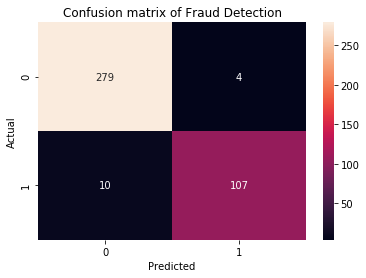

Stored 'confuse_lr' (ndarray)


In [5]:
linear_classifier = linear_model.LogisticRegression(max_iter=500, solver='newton-cg', C=3, random_state=1)
linear_classifier.fit(scaled_X_train, y_train)

# Predict train set
y_pred_train = linear_classifier.predict(scaled_X_train)
acc_train = accuracy_score(y_train, y_pred_train)
roc_train = roc_auc_score(y_train, y_pred_train)
print('Train Accuracy score: {0:0.5f}' .format(acc_train))
print('Train ROC score: {0:0.5f}' .format(roc_train))

# Predict test set
y_pred_test = linear_classifier.predict(scaled_X_test)
acc_test = accuracy_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_pred_test)
print('Test Accuracy score: {0:0.5f}' .format(acc_test))
print('Test ROC score: {0:0.5f}' .format(roc_test))

# Plot confusion matrix for test
confuse_lr = confusion_matrix(y_test, y_pred_test)
confuse_lr
fig = plt.figure()
sns.heatmap(confuse_lr, annot = True, fmt='d')
plt.title("Confusion matrix of Fraud Detection")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# store best results for logistic regression
%store confuse_lr

# GridSearchCV

In [6]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

# Hyperparameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [2, 3, 4, 5, 10, 12]

# Define grid search
param_grid = {'solver' : solvers, 'Cs' : c_values}

grid_search = GridSearchCV(LogisticRegressionCV(max_iter = 500, random_state=1), param_grid, cv=10)
grid_search.fit(scaled_X_train, y_train)
grid_search.best_params_

C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

Wall time: 19.4 s


C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\delim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'Cs': 3, 'solver': 'newton-cg'}

In [7]:
# Get best score
grid_search.best_score_

0.98

In [8]:
# Get best parameters
grid_search.best_params_

{'Cs': 3, 'solver': 'newton-cg'}

In [9]:
# Store search results in df
df = pd.DataFrame(grid_search.cv_results_)
df.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.131108,0.031057,0.000708,0.000470,2,newton-cg,"{'Cs': 2, 'solver': 'newton-cg'}",0.909091,1.0,1.0,1.0,1.0,0.9,0.9,1.000000,1.0,1.0,0.97,0.044823,13
1,0.097298,0.024893,0.000840,0.000329,2,lbfgs,"{'Cs': 2, 'solver': 'lbfgs'}",0.909091,1.0,1.0,1.0,1.0,0.9,0.9,1.000000,1.0,1.0,0.97,0.044823,13
2,0.017798,0.002117,0.001058,0.000485,2,liblinear,"{'Cs': 2, 'solver': 'liblinear'}",0.909091,1.0,1.0,1.0,0.9,1.0,0.9,1.000000,1.0,1.0,0.97,0.044823,13
3,0.114760,0.023812,0.001089,0.000303,3,newton-cg,"{'Cs': 3, 'solver': 'newton-cg'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,0.888889,1.0,1.0,0.98,0.041366,1
4,0.098675,0.031210,0.000703,0.000460,3,lbfgs,"{'Cs': 3, 'solver': 'lbfgs'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,0.888889,1.0,1.0,0.98,0.041366,1
5,0.017727,0.001743,0.000981,0.000038,3,liblinear,"{'Cs': 3, 'solver': 'liblinear'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,0.888889,1.0,1.0,0.98,0.041366,1
6,0.113188,0.006302,0.000807,0.000404,4,newton-cg,"{'Cs': 4, 'solver': 'newton-cg'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,0.888889,1.0,1.0,0.98,0.041366,1
7,0.102546,0.023023,0.000698,0.000407,4,lbfgs,"{'Cs': 4, 'solver': 'lbfgs'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,0.888889,1.0,1.0,0.98,0.041366,1
8,0.018598,0.002321,0.000798,0.000399,4,liblinear,"{'Cs': 4, 'solver': 'liblinear'}",1.000000,1.0,1.0,1.0,0.9,0.9,0.9,0.888889,1.0,1.0,0.96,0.050111,18
9,0.133096,0.016880,0.000779,0.000394,5,newton-cg,"{'Cs': 5, 'solver': 'newton-cg'}",1.000000,1.0,1.0,1.0,1.0,1.0,0.9,0.888889,1.0,1.0,0.98,0.041366,1


In [10]:
# save search results in csv
df.to_csv('LR_cv_result_5.csv')